<a href="https://colab.research.google.com/github/Sinrez/learn_python_course/blob/master/learn_python_data_sci_track_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



*  Survived - спасся ли пассажир (да- 1 или нет - 0)
*  Pclass - класс билета (1-й, 2-й или 3-Й)
*  SibSp - муж/жена/братья/сестры на борту
*  Parch - родители/дети на борту
*  Embarked - порт посадки (С - Cherbourg, S - Southampton, Q = Queenstown)

In [ ]:
df.loc[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
embarked = df.groupby('Embarked').count()['PassengerId']
embarked_max = embarked[embarked == embarked.max()].index[0]
df.loc[df['Embarked'].isnull(), 'Embarked'] = embarked_max

In [ ]:
df['Age'].median()

28.0

In [ ]:
df['Name'].str.extract('([A-Za-z]+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [ ]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
mapping = {'Don': 'RoyaltyM', 'Mme': 'Miss', 'Ms': 'Miss',
    'Major': 'Officer', 'Lady': 'RoyaltyF', 'Sir': 'RoyaltyM', 
    'Mlle': 'Miss', 'Col': 'Officer', 'Capt': 'Officer',
    'Countess': 'RoyaltyF', 'Jonkheer': 'RoyaltyM'}
    
df.replace({'Title': mapping}, inplace=True)
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'RoyaltyM', 'Rev', 'Dr', 'Officer',
       'RoyaltyF'], dtype=object)

In [ ]:
age_med = df.groupby('Title')['Age'].median()
age_med

Title
Dr          46.5
Master       3.5
Miss        21.5
Mr          30.0
Mrs         35.0
Officer     56.0
Rev         46.5
RoyaltyF    40.5
RoyaltyM    40.0
Name: Age, dtype: float64

In [ ]:
for t, a in age_med.iteritems():
  print(f'{t} {a}')

Dr 46.5
Master 3.5
Miss 21.5
Mr 30.0
Mrs 35.0
Officer 56.0
Rev 46.5
RoyaltyF 40.5
RoyaltyM 40.0


In [ ]:
for title, age in age_med.iteritems():
    filter_age = df['Age'].isnull()
    filter_title = df['Title'] == title
    df.loc[filter_age & filter_title, 'Age'] = age

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [ ]:
df.pivot_table(values='PassengerId', index='Pclass',
    columns='Survived', aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
# df['Sex'] доп задание из видео

mapping = {'male': 0, 'female':1}
    
df.replace({'Sex': mapping}, inplace=True)
df['Sex'].unique()
df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
df.pivot_table(values='PassengerId', index='Pclass',
    columns='Survived', aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Pclass'>

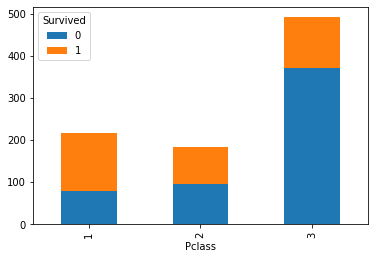

In [ ]:
surv_pclass = df.pivot_table(values='PassengerId', index='Pclass',
    columns='Survived', aggfunc='count')

surv_pclass.plot(kind='bar', stacked=True)

<Axes: xlabel='Title'>

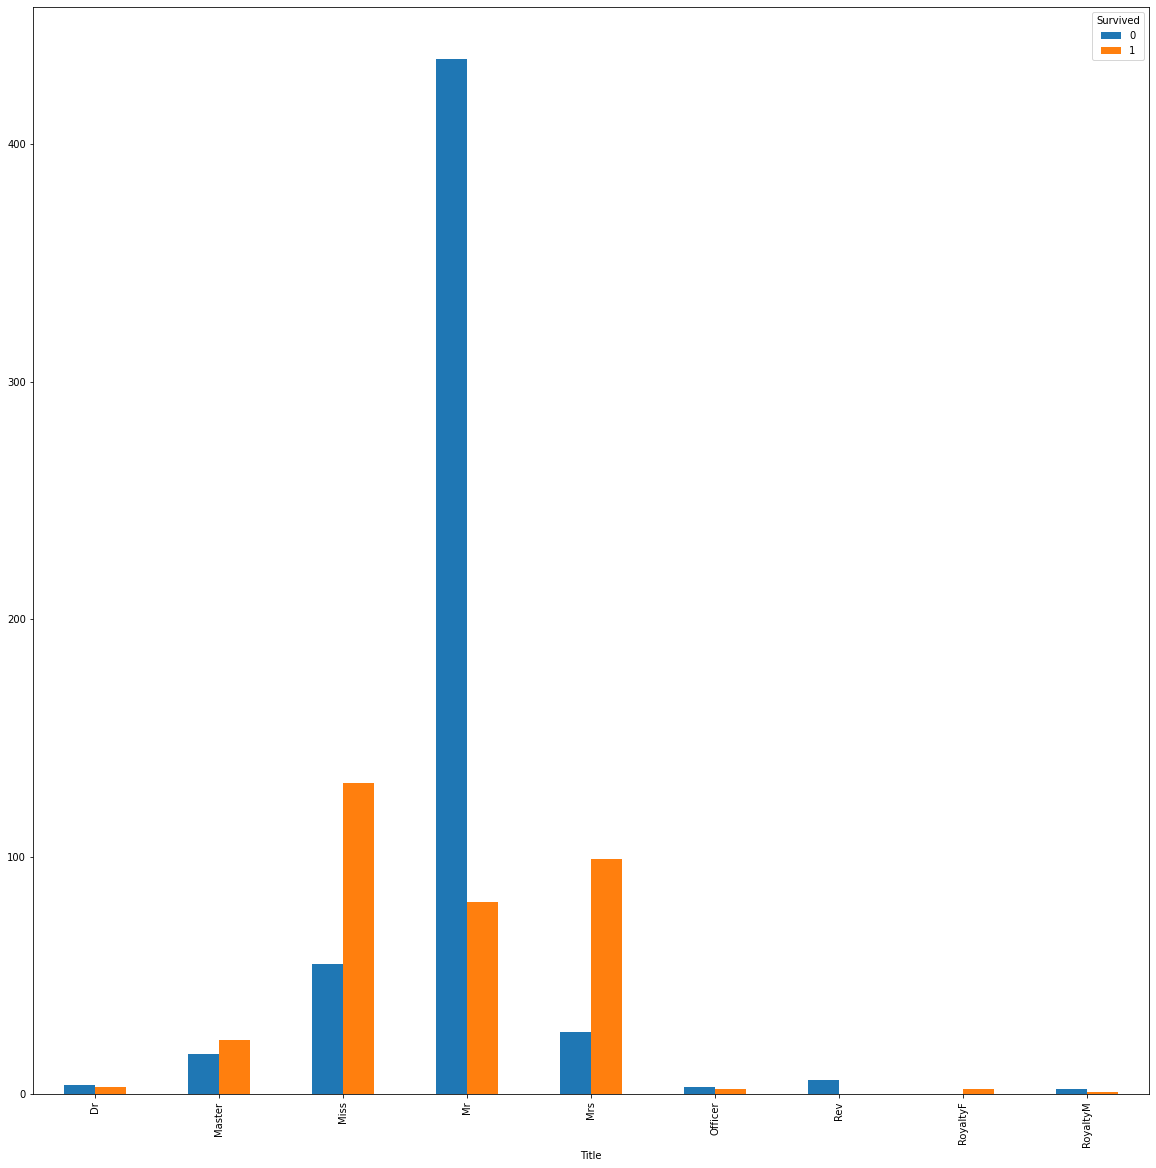

In [20]:
surv_title = df.pivot_table(values='PassengerId', index='Title',
    columns='Survived', aggfunc='count')

surv_title.plot(kind='bar', figsize=(20,20))

In [41]:
train = pd.read_csv('/content/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
train = train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [43]:
test = pd.read_csv('/content/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
result = pd.DataFrame(test['PassengerId'])
test = test.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1)

In [28]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [31]:
def transf_data(df):
  embarked = df.groupby('Embarked').count()['PassengerId']
  embarked_max = embarked[embarked == embarked.max()].index[0]
  df.loc[df['Embarked'].isnull(), 'Embarked'] = embarked_max
  return df

In [45]:
le.fit(train['Sex'])
print(le.classes_)
train['Sex'] = le.transform(train['Sex'])

['female' 'male']


In [49]:
classes = {}
le.fit(train['Sex'])
classes['Sex'] = le.classes_
train['Sex'] = le.transform(train['Sex'])

In [51]:
print(classes)

{'Sex': array([0, 1])}


In [67]:
le.fit(classes['Embarked'])
test['Embarked'] = le.transform(test['Embarked'])

KeyError: ignored

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
model_rf

RandomForestClassifier()

In [62]:
model_kn

KNeighborsClassifier(n_neighbors=20)

In [68]:
# ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'
#!!! Ошибка в данных курса!!!

scores = cross_val_score(model_rf, train, target, cv=5)
print(scores)
# print(scores.mean())

ValueError: ignored